In [1]:
from google.colab import drive
drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


#Fake News Classifier



In [2]:
!ls

drive  sample_data


In [44]:
import pandas as pd
import tensorflow as tf

In [45]:
tf.__version__

'2.2.0'

In [6]:
train=pd.read_csv('/content/drive/My Drive/Colab Notebooks/Fake News Classifier/Data/train.csv')

In [7]:
train.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [13]:
train['title']

0        House Dem Aide: We Didn’t Even See Comey’s Let...
1        FLYNN: Hillary Clinton, Big Woman on Campus - ...
2                        Why the Truth Might Get You Fired
3        15 Civilians Killed In Single US Airstrike Hav...
4        Iranian woman jailed for fictional unpublished...
                               ...                        
20795    Rapper T.I.: Trump a ’Poster Child For White S...
20796    N.F.L. Playoffs: Schedule, Matchups and Odds -...
20797    Macy’s Is Said to Receive Takeover Approach by...
20798    NATO, Russia To Hold Parallel Exercises In Bal...
20799                            What Keeps the F-35 Alive
Name: title, Length: 20800, dtype: object

In [15]:
train.shape

(20800, 5)

In [16]:
test=pd.read_csv('/content/drive/My Drive/Colab Notebooks/Fake News Classifier/Data/test.csv')

In [18]:
test.shape

(5200, 4)

In [21]:
test.head()

,id,title,author,text
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning..."
1,20801,Russian warships ready to strike terrorists ne...,NaN,Russian warships ready to strike terrorists ne...
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different..."
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...


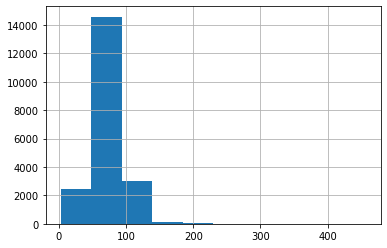

In [23]:
train['title'].str.len().hist()

**The histogram shows that title range from 5 to 220 characters and generally, it is between 50 to 140 characters**

In [24]:
import nltk

In [29]:
train.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

######We will train our model only on title.

Title contain only 558 null values out of 20k points so we can safely drop this.

In [33]:
train.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [34]:
train=train.dropna()

In [35]:
train.isnull().sum()

id        0
title     0
author    0
text      0
label     0
dtype: int64

In [36]:
#Get the x_train data
X_train=train.drop('label',axis=1)

In [38]:
X_train.head(2)

,id,title,author,text
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...


In [37]:
y_train=train['label']

In [40]:
y_train.head()

0    1
1    0
2    1
3    1
4    1
Name: label, dtype: int64

In [42]:
X_train.shape

(18285, 4)

In [43]:
y_train.shape

(18285,)

In [80]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM,Flatten,Dropout

In [49]:
import numpy as np

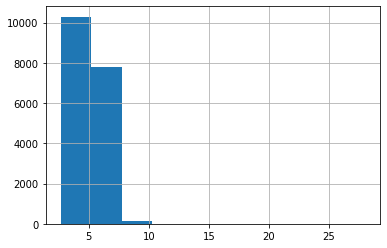

In [50]:
X_train['title'].str.split().\
   apply(lambda x : [len(i) for i in x]). \
   map(lambda x: np.mean(x)).hist()

Thus we can see from above plot that average length of title ranges from 3-11 and more generally between 3-6

#####One hot representation of title column word

In [51]:
df=X_train.copy()

In [52]:
df.reset_index(inplace=True)

In [53]:
import nltk
import re
from nltk.corpus import stopwords

In [54]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [58]:
#title stemming

from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
corpus=[]
for i in range(len(df)):
  #print(i)
  headline=re.sub('[^a-zA-Z]',' ',df['title'][i])
  headline=headline.lower()
  headline=headline.split()
  #stemming each word of the title
  headline=[ps.stem(word) for word in headline if not word in stopwords.words('english')]
  headline=' '.join(headline)
  corpus.append(headline)


In [60]:
corpus[0]

'hous dem aid even see comey letter jason chaffetz tweet'

Let's do one hot encoding of the words in title

In [62]:
vocab_size=5000
one_hot_representation=[one_hot(words,vocab_size) for words in corpus]

In [67]:
one_hot_representation[0:5]

[[1651, 4234, 680, 3267, 439, 60, 855, 4141, 4398, 1464],
 [2480, 191, 4890, 2845, 2508, 617, 3245],
 [1236, 91, 4247, 4280],
 [3483, 4819, 4613, 1814, 2777, 4985],
 [2993, 2508, 3729, 3395, 2720, 3192, 2508, 4267, 4635, 4286]]

Now we will do padding since all the sentence are of different length

In [68]:
sent_length=20
embedded_rep=pad_sequences(one_hot_representation,sent_length,padding='pre')
#can also do post padding

In [70]:
embedded_rep[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0, 1651,
       4234,  680, 3267,  439,   60,  855, 4141, 4398, 1464], dtype=int32)

In [71]:
embedded_rep.shape

(18285, 20)

Now Let's create our model

In [103]:
embedded_features=30
fake_model=Sequential()
fake_model.add(Embedding(vocab_size,embedded_features,input_length=sent_length))
fake_model.add(Dropout(0.3))
fake_model.add(LSTM(40,return_sequences=True))
fake_model.add(LSTM(20))
#fake_model.add(Flatten())
fake_model.add(Dropout(0.3))
fake_model.add(Dense(1,'sigmoid'))

In [104]:
fake_model.compile(optimizer='adam',metrics=['accuracy'],loss='binary_crossentropy')

In [105]:
fake_model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, 20, 30)            150000    
_________________________________________________________________
dropout_3 (Dropout)          (None, 20, 30)            0         
_________________________________________________________________
lstm_16 (LSTM)               (None, 20, 40)            11360     
_________________________________________________________________
lstm_17 (LSTM)               (None, 20)                4880      
_________________________________________________________________
dropout_4 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 21        
Total params: 166,261
Trainable params: 166,261
Non-trainable params: 0
________________________________________________

In [86]:
X_final=np.array(embedded_rep)
y_final=np.array(y_train)

In [87]:
print(X_final)
print(y_final)

[[   0    0    0 ... 4141 4398 1464]
 [   0    0    0 ... 2508  617 3245]
 [   0    0    0 ...   91 4247 4280]
 ...
 [   0    0    0 ... 4764 2074 3356]
 [   0    0    0 ... 4707 4270 4640]
 [   0    0    0 ... 4014 3358 3941]]
[1 0 1 ... 0 1 1]


In [88]:
X_final.shape

(18285, 20)

In [89]:
y_final.shape

(18285,)

In [90]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_final,y_final,test_size=0.33,random_state=42)

In [106]:
#fit the model
fake_model.fit(X_train,y_train,epochs=10,validation_data=(X_test,y_test),batch_size=64,verbose=1)

Epoch 1/10
192/192 [==============================] - 2s 13ms/step - loss: 0.3921 - accuracy: 0.8121 - val_loss: 0.2208 - val_accuracy: 0.9099
Epoch 2/10
192/192 [==============================] - 2s 10ms/step - loss: 0.1564 - accuracy: 0.9418 - val_loss: 0.1932 - val_accuracy: 0.9181
Epoch 3/10
192/192 [==============================] - 2s 10ms/step - loss: 0.1145 - accuracy: 0.9580 - val_loss: 0.2034 - val_accuracy: 0.9195
Epoch 4/10
192/192 [==============================] - 2s 10ms/step - loss: 0.0873 - accuracy: 0.9698 - val_loss: 0.2493 - val_accuracy: 0.9170
Epoch 5/10
192/192 [==============================] - 2s 10ms/step - loss: 0.0731 - accuracy: 0.9760 - val_loss: 0.2545 - val_accuracy: 0.9110
Epoch 6/10
192/192 [==============================] - 2s 10ms/step - loss: 0.0583 - accuracy: 0.9816 - val_loss: 0.2971 - val_accuracy: 0.9115
Epoch 7/10
192/192 [==============================] - 2s 10ms/step - loss: 0.0451 - accuracy: 0.9855 - val_loss: 0.3266 - val_accuracy: 0.9062

Now we will see the prediction of our model

In [111]:
y_pred=fake_model.predict_classes(X_test)

In [114]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [115]:
cf=confusion_matrix(y_test,y_pred)

In [116]:
print(cf)

[[3138  281]
 [ 293 2323]]


In [117]:
a_c=accuracy_score(y_test,y_pred)

In [118]:
print(a_c)

0.9048881524440763


So we got accuracy of about **90%** which can be improved by hyperparameter tuning.

Thanks !